In [ ]:
import numpy as np 
from glob import glob
import pandas as pd 
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import regularizers
import cv2

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

In [ ]:
df = pd.read_csv('../input/state-farm-distracted-driver-detection/driver_imgs_list.csv')
df.head(5)

In [4]:
train_images=[]
train_labels=[]
    
#Loop over the training folder
for class_num in tqdm(range(10)):
    print('Loading directory c{}'.format(class_num))
    files = glob(os.path.join('../input/state-farm-distracted-driver-detection/imgs/train/c' + str(class_num), '*.jpg'))
    for file in files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        train_images.append(img)
        train_labels.append(class_num)

  0%|          | 0/10 [00:00<?, ?it/s]

Loading directory c0


 10%|█         | 1/10 [00:22<03:18, 22.09s/it]

Loading directory c1


 20%|██        | 2/10 [00:42<02:48, 21.05s/it]

Loading directory c2


 30%|███       | 3/10 [01:03<02:26, 20.87s/it]

Loading directory c3


 40%|████      | 4/10 [01:24<02:05, 20.92s/it]

Loading directory c4


 50%|█████     | 5/10 [01:44<01:43, 20.66s/it]

Loading directory c5


 60%|██████    | 6/10 [02:13<01:34, 23.60s/it]

Loading directory c6


 70%|███████   | 7/10 [02:37<01:10, 23.57s/it]

Loading directory c7


 80%|████████  | 8/10 [03:00<00:46, 23.40s/it]

Loading directory c8


 90%|█████████ | 9/10 [03:18<00:21, 21.76s/it]

Loading directory c9


100%|██████████| 10/10 [03:38<00:00, 21.90s/it]


In [5]:
print(len(train_images))
print(len(train_labels))

22424
22424


In [6]:
y = np_utils.to_categorical(train_labels, 10)
X_train, X_test, y_train, y_test = train_test_split(train_images, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)

15696
6728
(64, 64)


In [7]:
X_train = np.array(X_train, dtype=np.uint8).reshape(-1,64,64,1)
X_test = np.array(X_test, dtype=np.uint8).reshape(-1,64,64,1)
print(X_train.shape)
print(X_test.shape)

(15696, 64, 64, 1)
(6728, 64, 64, 1)


In [8]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(15696, 64, 64, 1)
(3364, 64, 64, 1)
(3364, 64, 64, 1)


In [9]:
rows, cols = 64, 64

In [10]:
model = Sequential()
    
#CNN1
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(128, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))

#CNN2
model.add(Conv2D(256, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(256, kernel_size = 3, activation = 'relu', 
              padding = "SAME", input_shape = (rows, cols, 1),
              kernel_regularizer=regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))


#Output
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

2022-04-26 06:34:57.824946: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
#Details about the model
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                   epochs=10, batch_size=64, verbose=1)

print('History of the training',history.history)

2022-04-26 06:35:12.272954: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
246/246 [==============================] - 176s 706ms/step - loss: 3.0621 - accuracy: 0.3823 - val_loss: 3.1297 - val_accuracy: 0.2313
Epoch 2/10
246/246 [==============================] - 171s 695ms/step - loss: 1.0838 - accuracy: 0.7421 - val_loss: 1.3792 - val_accuracy: 0.6162
Epoch 3/10
246/246 [==============================] - 169s 686ms/step - loss: 0.7154 - accuracy: 0.8800 - val_loss: 0.7608 - val_accuracy: 0.8508
Epoch 4/10
246/246 [==============================] - 169s 689ms/step - loss: 0.6192 - accuracy: 0.9158 - val_loss: 2.5837 - val_accuracy: 0.4658
Epoch 5/10
246/246 [==============================] - 169s 686ms/step - loss: 0.5589 - accuracy: 0.9318 - val_loss: 0.6355 - val_accuracy: 0.9090
Epoch 6/10
246/246 [==============================] - 168s 685ms/step - loss: 0.5155 - accuracy: 0.9425 - val_loss: 0.4147 - val_accuracy: 0.9744
Epoch 7/10
246/246 [==============================] - 168s 683ms/step - loss: 0.4972 - accuracy: 0.9439 - val_loss: 0.4214 -

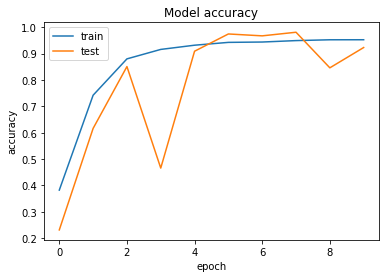

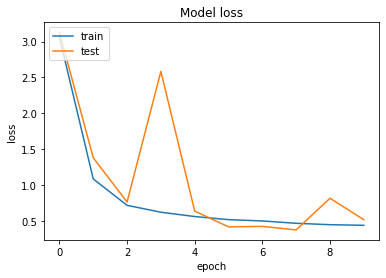

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
test_history = model.evaluate(X_test, y_test, verbose=1)

106/106 [==============================] - 10s 96ms/step - loss: 0.5202 - accuracy: 0.9221


In [19]:
print('Loss: ', test_history[0])
print('Accuracy: ', test_history[1]*100, ' %')

Loss:  0.5201753973960876
Accuracy:  92.21165180206299  %


In [32]:
action_dict = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}
    

1/1 [==============================] - 0s 31ms/step
Y prediction: [[2.2045538e-06 3.8826391e-09 9.4231318e-08 1.9202348e-06 9.9999416e-01
  1.9822544e-07 9.0329775e-07 4.4611166e-08 4.6768091e-07 7.6719189e-08]]
Predicted: Talking on the phone - left


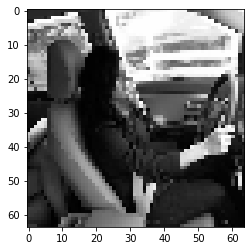

1/1 [==============================] - 0s 28ms/step
Y prediction: [[4.13959742e-06 2.50389644e-06 9.99542952e-01 1.32869200e-05
  1.39358846e-04 5.82740795e-05 1.16526433e-04 1.82827607e-05
  9.32784969e-05 1.14515615e-05]]
Predicted: Talking on the phone - right


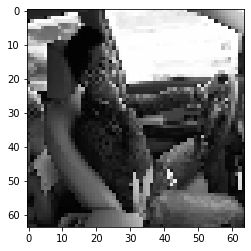

1/1 [==============================] - 0s 29ms/step
Y prediction: [[1.4575308e-03 2.5736319e-04 1.2475561e-03 1.2983342e-05 4.6971365e-04
  2.4505807e-04 2.8203320e-04 2.1782845e-04 9.7490203e-01 2.0907803e-02]]
Predicted: Hair and makeup


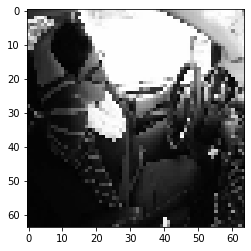

1/1 [==============================] - 0s 30ms/step
Y prediction: [[8.98641701e-06 3.11618442e-06 3.31394858e-06 9.94423687e-01
  5.23333997e-03 5.03583487e-06 2.73068940e-06 1.45576705e-05
  1.13878974e-04 1.91385698e-04]]
Predicted: Texting - left


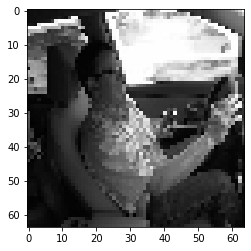

1/1 [==============================] - 0s 30ms/step
Y prediction: [[9.0239979e-08 1.4127663e-08 1.2568611e-05 1.6975457e-06 7.4525053e-07
  9.9998415e-01 3.5922261e-07 2.7327016e-07 1.4663605e-07 2.3441887e-08]]
Predicted: Operating the radio


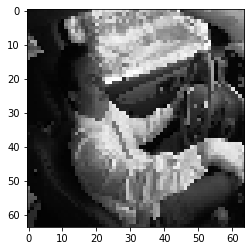

1/1 [==============================] - 0s 30ms/step
Y prediction: [[6.0133158e-07 1.8273925e-08 2.8738148e-06 7.5998003e-08 7.1238348e-05
  9.9987054e-01 4.3329852e-05 3.4889737e-07 9.6027516e-06 1.3067859e-06]]
Predicted: Operating the radio


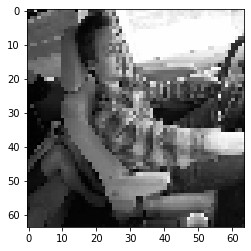

1/1 [==============================] - 0s 29ms/step
Y prediction: [[2.3218542e-10 2.7244273e-08 5.5184609e-07 2.1596303e-09 5.4510485e-07
  3.4424623e-08 9.9999833e-01 3.6008481e-09 2.9791758e-07 4.1797263e-09]]
Predicted: Drinking


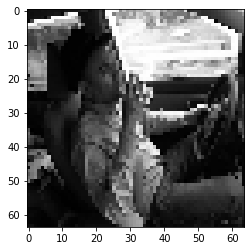

1/1 [==============================] - 0s 29ms/step
Y prediction: [[2.1363412e-07 1.6715788e-07 1.9822578e-04 1.6559406e-07 5.2579157e-06
  1.7715882e-06 8.9519233e-01 2.7687653e-07 1.0459826e-01 3.4138845e-06]]
Predicted: Drinking


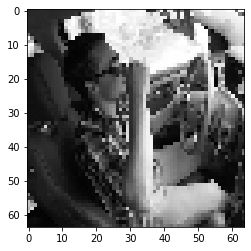

1/1 [==============================] - 0s 28ms/step
Y prediction: [[2.0740208e-06 7.9895948e-08 3.7142843e-06 1.4008569e-05 9.9985886e-01
  2.4963556e-06 7.6044722e-05 2.8956520e-06 3.1989210e-05 7.9666925e-06]]
Predicted: Talking on the phone - left


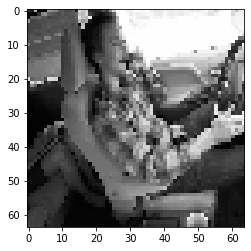

1/1 [==============================] - 0s 32ms/step
Y prediction: [[2.7280325e-06 2.4842594e-08 6.3087296e-05 1.0070640e-05 1.3843190e-04
  9.9945253e-01 2.3105737e-07 2.5754582e-04 4.9703744e-06 7.0419315e-05]]
Predicted: Operating the radio


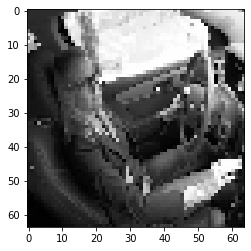

In [41]:
np.random.seed(42)
samples = np.random.choice(3364, 10, replace=False)
for i in samples:
    img = X_test[i]
    plt.imshow(img, cmap='gray')
    
    img = img.reshape(-1,64,64,1)
    y_prediction = model.predict(img, verbose=1)
    print('Y prediction: {}'.format(y_prediction))
    print('Predicted: {}'.format(activity_map.get('c{}'.format(np.argmax(y_prediction)))))
    
    plt.show()